In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import csv
import math
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('SteamEnglishReviews.csv')
print(df.head())

   Unnamed: 0                  app_name language  \
0           3  The Witcher 3: Wild Hunt  english   
1           5  The Witcher 3: Wild Hunt  english   
2           6  The Witcher 3: Wild Hunt  english   
3          18  The Witcher 3: Wild Hunt  english   
4          20  The Witcher 3: Wild Hunt  english   

                                              review  timestamp_created  \
0  One of the best RPG's of all time, worthy of a...         1611379970   
1             good story, good graphics. lots to do.         1611379264   
2                                           dis gud,         1611379091   
3  favorite game of all time cant wait for the Ne...         1611373086   
4                          Why wouldn't you get this         1611371978   

   timestamp_updated  recommended  votes_helpful  votes_funny  comment_count  \
0         1611379970         True              0            0              0   
1         1611379264         True              0            0              0

In [3]:
print (df.columns)

Index(['Unnamed: 0', 'app_name', 'language', 'review', 'timestamp_created',
       'timestamp_updated', 'recommended', 'votes_helpful', 'votes_funny',
       'comment_count', 'steam_purchase', 'received_for_free',
       'written_during_early_access', 'author.num_games_owned',
       'author.num_reviews', 'author.playtime_forever',
       'author.playtime_last_two_weeks', 'author.playtime_at_review',
       'author.last_played'],
      dtype='object')


In [4]:
df

,Unnamed: 0,app_name,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,steam_purchase,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,3,The Witcher 3: Wild Hunt,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,0,True,False,False,5,3,5587.0,3200.0,5524.0,1.611384e+09
1,5,The Witcher 3: Wild Hunt,english,"good story, good graphics. lots to do.",1611379264,1611379264,True,0,0,0,True,False,False,11,1,823.0,823.0,823.0,1.611379e+09
2,6,The Witcher 3: Wild Hunt,english,"dis gud,",1611379091,1611379091,True,0,0,0,True,False,False,27,2,4192.0,3398.0,4192.0,1.611352e+09
3,18,The Witcher 3: Wild Hunt,english,favorite game of all time cant wait for the Ne...,1611373086,1611373086,True,0,0,0,True,False,False,33,1,23329.0,177.0,23329.0,1.611219e+09
4,20,The Witcher 3: Wild Hunt,english,Why wouldn't you get this,1611371978,1611371978,True,0,0,0,True,False,False,131,2,8557.0,2004.0,8557.0,1.611371e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8780435,19999987,The Elder Scrolls V: Skyrim Special Edition,english,I WANT A REFUND\n,1588779455,1588779455,False,0,1,0,True,False,False,15,2,1653.0,0.0,217.0,1.593258e+09
8780436,19999989,The Elder Scrolls V: Skyrim Special Edition,english,You know you want it.,1588778760,1588778760,True,1,1,0,False,False,False,64,1,2969.0,0.0,1163.0,1.589317e+09
8780437,19999990,The Elder Scrolls V: Skyrim Special Edition,english,Very cool dragon and theft,1588777285,1588777285,True,0,0,0,True,False,False,32,6,1165.0,0.0,1063.0,1.598537e+09
8780438,19999994,The Elder Scrolls V: Skyrim Special Edition,english,The game is great,1588776021,1588776021,True,0,0,0,True,False,False,25,7,1861.0,0.0,768.0,1.603818e+09


In [5]:
df.describe()

,Unnamed: 0,timestamp_created,timestamp_updated,votes_helpful,votes_funny,comment_count,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780438e+06,8.780438e+06,8.769680e+06,8.780438e+06
mean,9.857102e+06,1.539505e+09,1.543040e+09,5.008932e+05,1.291368e+05,1.293550e-01,1.502837e+06,5.009029e+05,1.636568e+04,1.651123e+02,9.160439e+03,1.577832e+09
std,5.773377e+06,6.434651e+07,6.293887e+07,1.484232e+09,2.355034e+07,2.036609e+00,2.570764e+09,1.484232e+09,3.996454e+04,7.713387e+02,2.592765e+04,5.366909e+07
min,3.000000e+00,1.290198e+09,1.290198e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,5.153034e+06,1.498343e+09,1.504905e+09,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,2.000000e+00,1.299000e+03,0.000000e+00,5.980000e+02,1.569880e+09
50%,9.572375e+06,1.562131e+09,1.568998e+09,0.000000e+00,0.000000e+00,0.000000e+00,8.100000e+01,4.000000e+00,4.431000e+03,0.000000e+00,1.972000e+03,1.599436e+09
75%,1.529647e+07,1.591020e+09,1.592911e+09,1.000000e+00,0.000000e+00,0.000000e+00,1.870000e+02,1.100000e+01,1.496100e+04,0.000000e+00,7.126000e+03,1.609085e+09
max,2.000000e+07,1.611425e+09,2.117308e+09,4.398047e+12,4.294967e+09,1.432000e+03,4.398047e+12,4.398047e+12,3.744943e+06,2.375400e+04,3.228103e+06,1.611430e+09


## Removing Outliers

In [6]:
#30000
recs = df["votes_helpful"]
unique, counts = np.unique(recs, return_counts=True)
print(unique)

[            0             1             2 ...         28211         29608
 4398046511106]


In [7]:
#16000
recs = df["votes_funny"]
unique, counts = np.unique(recs, return_counts=True)
print(unique[1650:])

[     13635      13795      13806      14376      15417      15707
 4294967288 4294967289 4294967290 4294967291 4294967292 4294967293
 4294967294 4294967295]


In [8]:
#6000
recs = df["author.num_reviews"]
unique, counts = np.unique(recs, return_counts=True)
print(unique[720:])

[         3764          3766          3767          3772          3774
          4137          5236 4398046511105]


In [9]:
#23000
recs = df["author.num_games_owned"]
unique, counts = np.unique(recs, return_counts=True)
print(unique[5700:])

[        15523         15524         15871         15874         15887
         15919         15992         16113         16615         16617
         16811         16818         16821         16869         17197
         17206         17239         17312         17314         17318
         17319         17320         17321         17340         17343
         17344         17767         18640         18664         18666
         18956         19022         19024         19451         19465
         20391         20417         20420         20969         20972
         21865         21979         21980         22024 4398046511151
 4398046511170 4398046511619]


In [10]:
recs = df["author.playtime_at_review"]
unique, counts = np.unique(recs, return_counts=True)
print(unique[100000:])

[102338. 102339. 102340. ...     nan     nan     nan]


In [11]:
# Dropped all of the outliers in the dataset
df = df[df["votes_helpful"] < 30000]
df = df[df["votes_funny"] < 16000]
df = df[df["author.num_reviews"] < 6000]
df = df[df["author.num_games_owned"] < 23000]
# Get rid of the nan playtime values
df = df[np.isnan(df["author.playtime_at_review"]) == False]
# 10 years of play time
df = df[df["author.playtime_at_review"] < 60000]

In [12]:
df["recommended"] = df["recommended"].astype(int)

In [13]:
classifier_cols = ["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews"]

In [14]:
df.describe()

,Unnamed: 0,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502029e+06,8.502029e+06,8.502031e+06,8.502029e+06
mean,9.870912e+06,1.539283e+09,1.542497e+09,8.946034e-01,1.793062e+00,7.550092e-01,1.245168e-01,1.640030e+02,1.175650e+01,1.203496e+04,1.387828e+02,5.858401e+03,1.577191e+09
std,5.763546e+06,6.444947e+07,6.319413e+07,3.070638e-01,4.427301e+01,3.345614e+01,1.956048e+00,3.085293e+02,3.480477e+01,2.293986e+04,6.578127e+02,9.740206e+03,5.316229e+07
min,3.000000e+00,1.290198e+09,1.290198e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,5.174430e+06,1.498099e+09,1.503770e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,2.000000e+00,1.248000e+03,0.000000e+00,5.730000e+02,1.567947e+09
50%,9.581016e+06,1.562080e+09,1.566538e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.200000e+01,5.000000e+00,4.140000e+03,0.000000e+00,1.846000e+03,1.598745e+09
75%,1.528021e+07,1.591210e+09,1.592918e+09,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.890000e+02,1.100000e+01,1.324400e+04,0.000000e+00,6.236000e+03,1.608913e+09
max,2.000000e+07,1.611425e+09,2.117308e+09,1.000000e+00,2.960800e+04,1.570700e+04,1.432000e+03,2.202400e+04,5.236000e+03,2.376680e+06,2.235300e+04,5.999900e+04,1.611430e+09


## Dataset Analysis

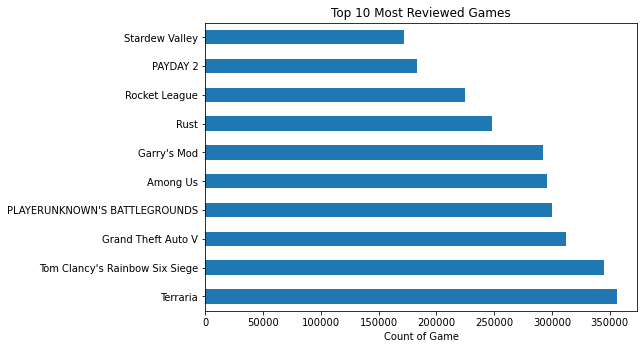

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title("Top 10 Most Reviewed Games")
plt.xlabel('Count of Game')
df['app_name'].value_counts()[:10].plot(kind='barh')

In [16]:
recs = df["recommended"]
unique, counts = np.unique(recs, return_counts=True)
print("Non-recommendations:", counts[0], "Recommendations:", counts[1])
# Keep the split how it is

Non-recommendations: 896085 Recommendations: 7605946


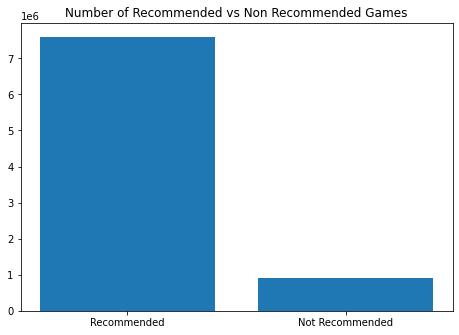

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

plt.title("Number of Recommended vs Non Recommended Games")

unique, counts = np.unique(df["recommended"], return_counts=True)
sizes = [counts[1], counts[0]]
labels = ['Recommended', 'Not Recommended']

ax.bar(labels,sizes)
plt.show()

## Trimming dataset down

In [18]:
len(df)

8502031

In [19]:
not_rec = df[df["recommended"]==0]
num_no_rec= len(not_rec)

#sample function shuffles the values
yes_rec = df[df["recommended"]==1].sample(frac=1)[0:num_no_rec]
num_yes_rec = len(df[df["recommended"]==1])

# Cuts the dataset down to 500000 values while keeping the ratio of recommended vs nonrecommended
var = int((num_no_rec/len(df)) * 500000)
no_split = not_rec.sample(frac=1)[0:var]
yes_split = df[df["recommended"]==1].sample(frac=1)[0:500000 - var]

df_equal = pd.concat([no_split,yes_split])

# The left over data will be used for prediction testing of our classifiers
no_split_leftover = not_rec.sample(frac=1)[var:num_no_rec]
yes_split_leftover = df[df["recommended"]==1].sample(frac=1)[500000 - var:num_yes_rec]

# Unclassified data set
df_test = pd.concat([no_split_leftover, yes_split_leftover])

In [20]:
recs = df_test["recommended"]
unique, counts = np.unique(recs, return_counts=True)
print("Unclassified Data Set = Non-recommendations:", counts[0], "Recommendations:", counts[1])

Unclassified Data Set = Non-recommendations: 843387 Recommendations: 7158644


In [21]:
recs = df_equal["recommended"]
unique, counts = np.unique(recs, return_counts=True)
print("Classified Data Set = Non-recommendations:", counts[0], "Recommendations:", counts[1])
# Keep the split how it is

Classified Data Set = Non-recommendations: 52698 Recommendations: 447302


In [22]:
df_equal

,Unnamed: 0,app_name,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,steam_purchase,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
5946667,12668396,The Binding of Isaac,english,"An excellent game however the remake, Rebirth,...",1486568023,1486568023,0,0,0,0,True,False,False,175,5,15.0,0.0,12.0,1.486792e+09
4562324,9886005,Rocket League,english,"They removed Linux support, so there aren't en...",1586555118,1586555118,0,1,0,0,False,False,False,2442,28,530.0,0.0,530.0,1.495892e+09
7156517,16587652,ARK: Survival Evolved,english,if u are loooking for the glitchiest worst pro...,1505323308,1505323308,0,2,1,0,True,False,False,37,3,50699.0,799.0,28203.0,1.611188e+09
6246802,13556451,Grand Theft Auto V,english,Do not buy this game. It has no future thanks ...,1497531682,1497531682,0,0,0,0,True,False,False,104,1,1834.0,0.0,1565.0,1.559203e+09
5618012,12062141,Age of Empires II (2013),english,Are you an absolute badass in RTS games?\nNo?\...,1536269517,1598293000,0,0,0,0,True,False,False,308,31,3437.0,0.0,3437.0,1.598293e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040389,12884636,Grand Theft Auto V,english,kinmda borimg sometimes but sometimes ok,1593939388,1593939388,1,0,0,0,True,False,False,198,15,19696.0,263.0,13206.0,1.610086e+09
5787763,12383754,DOOM,english,This is the pinaccle of Videogames. It does no...,1492822419,1492822419,1,2,0,0,False,False,False,722,33,222.0,0.0,108.0,1.549841e+09
7135087,16535896,ARK: Survival Evolved,english,I spent 1khrs+ in this game... This game is co...,1551130486,1551130486,1,5,0,0,False,False,False,90,2,62186.0,0.0,50271.0,1.606983e+09
6425999,14587427,PLAYERUNKNOWN'S BATTLEGROUNDS,english,Good gamee.,1536505880,1536505880,1,0,0,0,True,False,False,23,1,7668.0,0.0,6562.0,1.545866e+09


In [23]:
#sample function shuffles the values
shuffled = df_equal.sample(frac=1)[0:len(df_equal)]

# Trimmed dataset for testing purposes
#updated_df = shuffled[:100000]

updated_df = shuffled

## Normilazation

In [25]:
from sklearn import preprocessing

def calc_norm(dataframe):
    # ["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews"]
    df_norm = preprocessing.normalize(dataframe[classifier_cols])
    df_norm = pd.DataFrame(df_norm)

    dataframe[classifier_cols] = np.array(df_norm)
    return dataframe

#updated_df = calc_norm(updated_df)
#updated_df

## Standardization

In [27]:
def calc_stand(dataframe):
    # ["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews"]
    dataframe[classifier_cols] = preprocessing.StandardScaler().fit_transform(dataframe[classifier_cols])

    return dataframe

#updated_df = calc_stand(updated_df)
#updated_df

## Sentiment Analysis

In [28]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

text = "I love you so much"

s = TextBlob("I love you so much")
print("Textblob:", s.sentiment)

s1 = SentimentIntensityAnalyzer()
sentiment_dict = s1.polarity_scores(text)
print("VADER:", sentiment_dict)
if sentiment_dict['compound'] >= 0.05 :
    print("Positive")

elif sentiment_dict['compound'] <= - 0.05 :
    print("Negative")

else :
    print("Neutral")

Textblob: Sentiment(polarity=0.35, subjectivity=0.4)
VADER: {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}
Positive


In [53]:
def calc_polarity(dataframe):
    polarityV = []
    polarityV_label = []
    s = SentimentIntensityAnalyzer()
    for review in dataframe["review"]:
        sent_dict = s.polarity_scores(str(review))
        polarityV.append(sent_dict['compound'])

    dataframe["polarityV"] = polarityV
    return dataframe

# updated_df = calc_polarity(updated_df)
# updated_df

In [54]:
#df_test_NB = calc_norm(df_test_NB)
updated_df = calc_stand(updated_df)
updated_df = calc_polarity(updated_df)

## KNN Classification

## Classifier testing on untrained data

## Naive Bayes Classification

In [55]:
#df_test_NB = calc_norm(df_test_NB)
# data_NB = calc_stand(updated_df)
# data_NB = calc_polarity(updated_df)

In [56]:
data_NB = updated_df[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_NB = updated_df["recommended"]

X_NB = np.array(data_NB)
Y_NB = np.array(labels_NB)

In [57]:
x_train_NB, x_test_NB, y_train_NB, y_test_NB = sklearn.model_selection.train_test_split(X_NB, Y_NB, test_size = 0.20, random_state = 0)

In [58]:
x_train_NB

array([[-0.03748059, -0.02394021, -0.51718708, -0.56326818, -0.31230007,
         0.4215    ],
       [-0.03748059, -0.02394021, -0.4978223 , -0.52799967, -0.2539184 ,
         0.        ],
       [ 0.10501877, -0.02394021,  0.25417679,  0.02676167, -0.28310923,
         0.896     ],
       ...,
       [-0.01712354, -0.02394021, -0.25576251,  0.97009177, -0.28310923,
         0.        ],
       [-0.03748059, -0.02394021, -0.43327302, -0.49262864, -0.28310923,
         0.4215    ],
       [-0.01712354, -0.02394021, -0.20089562, -0.50226597, -0.2539184 ,
         0.4926    ]])

In [59]:
y_test_NB

array([1, 1, 1, ..., 0, 1, 1])

In [60]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train_NB, y_train_NB)

GaussianNB()

In [61]:
x_test_NB

array([[-0.03748059, -0.02394021, -0.19121323,  0.44372977, -0.22472756,
         0.        ],
       [-0.03748059, -0.02394021, -0.32353925,  5.54874395, -0.10796423,
         0.4215    ],
       [-0.01712354,  0.00685272,  0.30258875, -0.08827108, -0.1663459 ,
         0.1531    ],
       ...,
       [ 0.26787518, -0.02394021, -0.48168498,  4.22504708, -0.2539184 ,
        -0.1796    ],
       [-0.03748059, -0.02394021, -0.0685696 ,  0.6286844 , -0.07877339,
         0.9923    ],
       [-0.03748059, -0.02394021, -0.43004556, -0.51374874, -0.31230007,
         0.8622    ]])

In [62]:
y_test_NB[:40]

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [63]:
y_pred_NB = classifier.predict(x_test_NB)
y_pred_NB[:40]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [64]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test_NB, y_pred_NB)
ac = accuracy_score(y_test_NB, y_pred_NB)
print(ac)

0.89006


In [65]:
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_NB, y_pred_NB))
print("Precision:",metrics.precision_score(y_test_NB, y_pred_NB))
print("Recall:",metrics.recall_score(y_test_NB, y_pred_NB))
print("F1:",metrics.f1_score(y_test_NB, y_pred_NB))

Accuracy: 0.89006
Precision: 0.9005119210295527
Recall: 0.9861743947109801
F1: 0.9413984627357334


## Classifier testing on untrained data

In [66]:
# Shuffle the data around
df_test_NB = df_test.sample(frac=1)[0:len(df_test)]
yes_recs_NB = df_test_NB[df_test_NB["recommended"]==1]
no_recs_NB = df_test_NB[df_test_NB["recommended"]==0]
df_test_NB = pd.concat([yes_recs_NB[:5], no_recs_NB[:5]])

In [67]:
#df_test_NB = calc_norm(df_test_NB)
df_test_NB = calc_stand(df_test_NB)
df_test_NB = calc_polarity(df_test_NB)

In [68]:
df_test_NB[["app_name", "review", "polarityV", "recommended", "votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews"]]

,app_name,review,polarityV,recommended,votes_helpful,votes_funny,author.num_games_owned,author.playtime_at_review,author.num_reviews
3224343,Among Us,It's a very good game,0.4927,1,-0.807573,-0.468521,-1.035530,-0.567340,-0.962250
6720279,Monster Hunter: World,Gameplay is satisfying and very fun. Great game.,0.8995,1,-0.807573,2.654954,0.792872,0.327571,0.192450
8067343,Terraria,One of the best games i've played.,0.7650,1,-0.807573,-0.468521,-0.211621,2.834879,-0.384900
4122452,Doki Doki Literature Club,"Ok, I went into this without reading any descr...",0.3182,1,-0.807573,-0.468521,-0.725153,-0.621591,-0.962250
2019186,Wallpaper Engine,This is so amazing! I Definately recommend sin...,0.9629,1,-0.807573,-0.468521,-0.984741,-0.381688,-0.192450
6239978,Grand Theft Auto V,Take 2 have no respect for their community or ...,0.1144,0,0.807573,-0.468521,1.436198,-0.602914,0.192450
6538464,PLAYERUNKNOWN'S BATTLEGROUNDS,"Fun idea, but those Blowhole dudes have no ide...",0.7130,0,0.269191,-0.468521,-0.713867,-0.289640,-0.577350
1199450,Getting Over It with Bennett Foddy,The only thing impressive about this scam is t...,-0.7650,0,0.269191,1.093216,1.932801,-0.606694,2.694301
7308899,No Man's Sky,Refund..please?,0.0000,0,2.422719,-0.468521,-0.651791,-0.348337,0.384900
982446,Sid Meier's Civilization VI,im sorry that this great series has come to this.,0.5859,0,0.269191,-0.468521,0.160832,0.255756,-0.384900


In [69]:
data_NB_UNT = df_test_NB[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_NB_UNT = df_test_NB["recommended"]

X_NB_UNT = np.array(data_NB_UNT)
Y_NB_UNT = np.array(labels_NB_UNT)

In [70]:
df_test_NB[["review","recommended", "votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]

,review,recommended,votes_helpful,votes_funny,author.num_games_owned,author.playtime_at_review,author.num_reviews,polarityV
3224343,It's a very good game,1,-0.807573,-0.468521,-1.035530,-0.567340,-0.962250,0.4927
6720279,Gameplay is satisfying and very fun. Great game.,1,-0.807573,2.654954,0.792872,0.327571,0.192450,0.8995
8067343,One of the best games i've played.,1,-0.807573,-0.468521,-0.211621,2.834879,-0.384900,0.7650
4122452,"Ok, I went into this without reading any descr...",1,-0.807573,-0.468521,-0.725153,-0.621591,-0.962250,0.3182
2019186,This is so amazing! I Definately recommend sin...,1,-0.807573,-0.468521,-0.984741,-0.381688,-0.192450,0.9629
6239978,Take 2 have no respect for their community or ...,0,0.807573,-0.468521,1.436198,-0.602914,0.192450,0.1144
6538464,"Fun idea, but those Blowhole dudes have no ide...",0,0.269191,-0.468521,-0.713867,-0.289640,-0.577350,0.7130
1199450,The only thing impressive about this scam is t...,0,0.269191,1.093216,1.932801,-0.606694,2.694301,-0.7650
7308899,Refund..please?,0,2.422719,-0.468521,-0.651791,-0.348337,0.384900,0.0000
982446,im sorry that this great series has come to this.,0,0.269191,-0.468521,0.160832,0.255756,-0.384900,0.5859


In [71]:
y_pred_NB_UNT = classifier.predict(X_NB_UNT)
print(y_pred_NB_UNT)

[1 1 1 1 1 1 1 0 0 1]


In [72]:
Y_NB_UNT

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [73]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(Y_NB_UNT, y_pred_NB_UNT))
print("Precision:",metrics.precision_score(Y_NB_UNT, y_pred_NB_UNT))
print("Recall:",metrics.recall_score(Y_NB_UNT, y_pred_NB_UNT))
print("F1:",metrics.f1_score(Y_NB_UNT, y_pred_NB_UNT))

Accuracy: 0.7
Precision: 0.625
Recall: 1.0
F1: 0.7692307692307693


## XGBoost Classification

In [74]:
updated_df

,Unnamed: 0,app_name,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,steam_purchase,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,polarityV
5393622,11511505,FTL: Faster Than Light,english,"Amazing game that everyone should play, great ...",1403571352,1403571352,1,-0.037481,-0.023940,0,True,False,False,0.370365,-0.253918,2671.0,5.0,-0.429371,1.609984e+09,0.9545
1957213,4501210,Wallpaper Engine,english,l,1608986616,1608986616,1,-0.037481,-0.023940,0,True,False,False,-0.497822,-0.283109,188.0,1.0,-0.582645,1.610188e+09,0.4588
7900293,18245810,Don't Starve Together,english,I didnt like the normal don't starve too much ...,1443458941,1443458941,1,-0.037481,0.037646,0,True,False,True,-0.378406,-0.166346,4517.0,0.0,-0.270047,1.573487e+09,0.9539
6130042,13190775,Grand Theft Auto V,english,its gta v play it,1574914864,1574914864,1,-0.037481,-0.023940,0,True,False,False,0.225130,0.329898,6862.0,0.0,-0.461666,1.597106e+09,0.3400
7539293,17293182,Fallout 4,english,"I admittedly do enjoy playing it, but as many ...",1452624565,1452624565,0,0.043948,-0.023940,0,False,False,False,0.405868,1.088860,27166.0,0.0,1.090251,1.550288e+09,-0.0387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024052,8761008,Totally Accurate Battle Simulator,english,This game is one of the best and accurate batt...,1562240687,1562240687,1,-0.037481,-0.023940,0,True,False,True,0.034709,-0.137155,484.0,0.0,-0.559782,1.565440e+09,0.7896
7716596,17758843,Middle-earth™: Shadow of War™,english,Good battle.,1597253293,1597253293,1,-0.037481,-0.023940,0,True,False,False,0.021799,0.008799,3466.0,0.0,-0.479095,1.599325e+09,0.0772
7813521,17972504,Hearts of Iron IV,english,I have no idea why these dogs came out and pos...,1481846705,1481846705,1,0.003234,0.037646,0,False,False,False,2.855513,1.906203,19282.0,0.0,0.352790,1.514403e+09,-0.4833
2805117,6331330,Tom Clancy's Rainbow Six Siege,english,roaming doc\n,1572058458,1609892736,1,-0.017124,-0.023940,0,False,False,False,-0.313857,0.096372,1885.0,328.0,-0.441776,1.610776e+09,0.0000


In [76]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [77]:
data_XGB = updated_df[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_XGB = updated_df["recommended"]

X_XGB = np.array(data_XGB)
Y_XGB = np.array(labels_XGB)

In [78]:
X_train_XGB, X_test_XGB, y_train_XGB, y_test_XGB = train_test_split(X_XGB, Y_XGB, test_size=0.20, random_state=0)

In [79]:
# fit model no training data

no_vals = updated_df[updated_df["recommended"]==0]
yes_vals = updated_df[updated_df["recommended"]==1]

# Controls the balance of positive and negative weights as recommended by the xgboost docs
ratio = float(np.sum(len(no_vals))) / np.sum(len(yes_vals))

model = XGBClassifier(scale_pos_weight = ratio)
model.fit(X_train_XGB, y_train_XGB)

C:\Users\Tarnjit458\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:16:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.11781302118032112,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [80]:
# make predictions for test data
y_pred_XGB = model.predict(X_test_XGB)
y_pred_XGB

array([1, 1, 0, ..., 0, 1, 1])

In [81]:
y_test_XGB

array([1, 1, 1, ..., 0, 1, 1])

In [82]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_XGB, y_pred_XGB))
print("Precision:",metrics.precision_score(y_test_XGB, y_pred_XGB))
print("Recall:",metrics.recall_score(y_test_XGB, y_pred_XGB))
print("F1:",metrics.f1_score(y_test_XGB, y_pred_XGB))

Accuracy: 0.80902
Precision: 0.96964
Recall: 0.8121482176360225
F1: 0.883933780630105


## Classifier testing on untrained data

In [83]:
# Shuffle the data around
df_test_XGB = df_test.sample(frac=1)[0:len(df_test)]
yes_recs_XGB = df_test_XGB[df_test_XGB["recommended"]==1]
no_recs_XGB = df_test_XGB[df_test_XGB["recommended"]==0]
df_test_XGB = pd.concat([yes_recs_XGB[:5], no_recs_XGB[:5]])

In [84]:
#df_test_NB = calc_norm(df_test_NB)
df_test_XGB = calc_stand(df_test_XGB)
df_test_XGB = calc_polarity(df_test_XGB)

In [85]:
df_test_XGB[["app_name", "review","recommended", "votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]

,app_name,review,recommended,votes_helpful,votes_funny,author.num_games_owned,author.playtime_at_review,author.num_reviews,polarityV
7180464,ARK: Survival Evolved,this game is amazing i love it,1,-1.118034,-0.468521,-0.658566,-0.648383,-0.743991,0.8402
187344,Counter-Strike: Source,Old ScooLL <3,1,-1.118034,-0.468521,-0.655919,-0.747926,-0.473449,0.4404
8247676,Terraria,One of my favourite games of all time once u f...,1,1.118034,-0.468521,-0.584451,1.926894,-0.473449,0.7332
2750686,Tom Clancy's Rainbow Six Siege,10/10,1,-1.118034,1.093216,-0.560628,-0.600816,-0.608720,0.0000
4327680,Dishonored,Fantastic! Gonna play second one now.,1,0.000000,-0.468521,-0.613568,-0.546162,-0.608720,0.7424
6238401,Grand Theft Auto V,Thanks for ruining the modding community of gr...,0,1.118034,-0.468521,2.475447,-0.571521,0.473449,0.5994
6741233,The Elder Scrolls Online,0/10\nHow about we remove a good skill Crystal...,0,0.000000,-0.468521,-0.306519,-0.669016,2.367244,0.4075
2683743,Tom Clancy's Rainbow Six Siege,meh,0,-1.118034,-0.468521,-0.478572,-0.664606,-0.473449,-0.0772
6452731,PLAYERUNKNOWN'S BATTLEGROUNDS,🗑️,0,1.118034,2.654954,0.101114,1.616452,-0.743991,0.0000
6426109,PLAYERUNKNOWN'S BATTLEGROUNDS,"When its good, it is great.\nWhen its not, its...",0,1.118034,-0.468521,1.281663,0.905084,1.285075,0.4767


In [86]:
data_XGB_UNT = df_test_XGB[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_XGB_UNT = df_test_XGB["recommended"]

X_XBG_UNT = np.array(data_XGB_UNT)
Y_XBG_UNT = np.array(labels_XGB_UNT)

In [87]:
y_pred_XGB_UNT = model.predict(X_XBG_UNT)
y_pred_XGB_UNT

C:\Users\Tarnjit458\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


array([1, 1, 0, 0, 1, 0, 0, 0, 1, 0])

In [88]:
Y_XBG_UNT

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [89]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(Y_XBG_UNT, y_pred_XGB_UNT))
print("Precision:",metrics.precision_score(Y_XBG_UNT, y_pred_XGB_UNT))
print("Recall:",metrics.recall_score(Y_XBG_UNT, y_pred_XGB_UNT))
print("F1:",metrics.f1_score(Y_XBG_UNT, y_pred_XGB_UNT))

Accuracy: 0.7
Precision: 0.75
Recall: 0.6
F1: 0.6666666666666665


## AdaBoost Classification

## Classifier testing on untrained data